In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df = pd.read_csv('final\dbParaAnalisis.csv')
df['date'] = pd.to_datetime(df['date'])
df['Positivo'] = df['Sentimiento']
df['Negativo'] = abs(df['Sentimiento']-1)
df.drop('Sentimiento', axis=1, inplace = True)
df



<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_12564\1747040352.py:8: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('final\dbParaAnalisis.csv')


,date,tweet,Palabras,procTweet,relevance,topic,Positivo,Negativo
0,2023-01-01,"Resuelto, muchísimas gracias , excelente servi...",8,resuelto muchísimas gracias excelente servic...,1,misc,1.0,0.0
1,2023-01-02,"Muchas gracias, espero su dm",5,muchas gracias espero dm,0,misc,1.0,0.0
2,2023-01-02,Muchas gracias!,2,muchas gracias,0,misc,1.0,0.0
3,2023-01-02,Algo similar me paso. Quería renovar mi token ...,28,similar paso quería renovar token poder hacer...,1,misc,0.0,1.0
4,2023-01-02,Yeeeei! a través de mi cuenta en acabo de cont...,47,yeeeei través cuenta acabo contratar cuenta a...,1,misc,0.0,1.0
...,...,...,...,...,...,...,...,...
806,2024-04-21,"Ahora confirmo, gracias estimado",4,ahora confirmo gracias estimado,0,misc,1.0,0.0
807,2024-04-23,:cara_desanimada: de acuerdo!! Muchas gracias.,5,cara_desanimada acuerdo muchas gracias,0,misc,1.0,0.0
808,2024-04-23,"Tío cuando me van a graduar, tengo la TDC gara...",32,tío van graduar tdc garantizada hace año saqu...,1,support,1.0,0.0
809,2024-04-25,"una duda, con quién tengo que ver si tengo pro...",38,duda quién ver si problemas aumentar línea cr...,1,misc,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       811 non-null    datetime64[ns]
 1   tweet      811 non-null    object        
 2   Palabras   811 non-null    int64         
 3   procTweet  811 non-null    object        
 4   relevance  811 non-null    int64         
 5   topic      811 non-null    object        
 6   Positivo   811 non-null    float64       
 7   Negativo   811 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 50.8+ KB


In [4]:
df2 = df[['date', 'Positivo', 'Negativo']].groupby(['date']).sum()
df2.reset_index(inplace = True)
df2



,date,Positivo,Negativo
0,2023-01-01,1.0,0.0
1,2023-01-02,2.0,3.0
2,2023-01-03,3.0,0.0
3,2023-01-04,2.0,0.0
4,2023-01-05,3.0,0.0
...,...,...,...
319,2024-04-18,2.0,1.0
320,2024-04-21,1.0,0.0
321,2024-04-23,2.0,0.0
322,2024-04-25,0.0,1.0


C:\Users\HP\AppData\Local\Temp\ipykernel_12564\2889753545.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(abs(tick)) for tick in ticks])


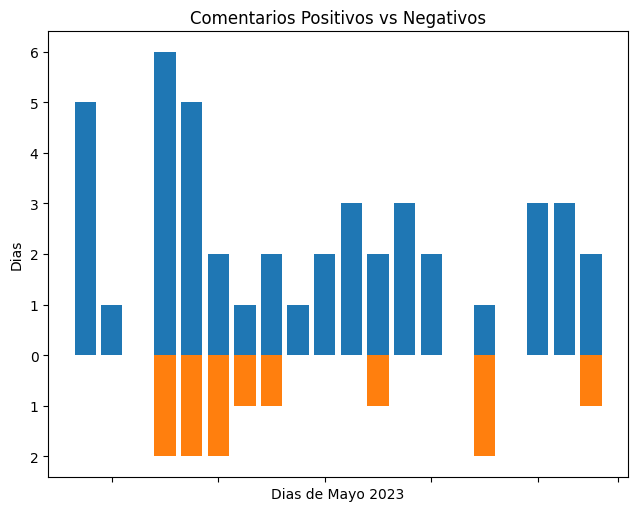

In [6]:
df2['date'] = pd.to_datetime(df2['date'])
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

def f_mes(n_mes,año):
    df_año = df2[df2['year']==año]
    df_mes = df_año[df_año['month']==n_mes]
    return df_mes
def grafico_comentarios(mes,año):
    fig, ax = plt.subplots()
    ax.bar(f_mes(mes,año).date, f_mes(mes,año).Positivo)
    ax.bar(f_mes(mes,año).date, f_mes(mes,año).Negativo*-1)

    if mes == 1:
        m = 'Enero'
    if mes == 2:
        m = 'Febrero'
    if mes == 3:
        m = 'Marzo'
    if mes == 4:
        m = 'Abril'
    if mes == 5:
        m = 'Mayo'
    if mes == 6:
        m = 'Junio'
    if mes == 7:
        m = 'Julio'
    if mes == 8:
        m = 'Agosto'
    if mes == 9:
        m = 'Septiembre'
    if mes == 10:
        m = 'Octubre'
    if mes == 11:
        m = 'Noviembre'
    if mes == 12:
        m = 'Diciembre'

    # Formatting x labels
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.tick_params(labelbottom=False)
    plt.tight_layout()
    plt.title('Comentarios Positivos vs Negativos')
    plt.xlabel('Dias de '+m+' '+str(año))
    plt.ylabel('Dias')
    
    # Use absolute value for y-ticks
    ticks =  ax.get_yticks()
    ax.set_yticklabels([int(abs(tick)) for tick in ticks])
    plt.show()

grafico_comentarios(5, 2023)


In [72]:
df = pd.read_csv('dbParaAnalisis.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,tweet,Palabras,procTweet,Sentimiento,relevance,topic
0,2023-01-01,"Resuelto, muchísimas gracias , excelente servi...",8,resuelto muchísimas gracias excelente servic...,1.0,1,misc
1,2023-01-02,"Muchas gracias, espero su dm",5,muchas gracias espero dm,1.0,0,misc
2,2023-01-02,Muchas gracias!,2,muchas gracias,1.0,0,misc
3,2023-01-02,Algo similar me paso. Quería renovar mi token ...,28,similar paso quería renovar token poder hacer...,0.0,1,misc
4,2023-01-02,Yeeeei! a través de mi cuenta en acabo de cont...,47,yeeeei través cuenta acabo contratar cuenta a...,0.0,1,misc
...,...,...,...,...,...,...,...
806,2024-04-21,"Ahora confirmo, gracias estimado",4,ahora confirmo gracias estimado,1.0,0,misc
807,2024-04-23,:cara_desanimada: de acuerdo!! Muchas gracias.,5,cara_desanimada acuerdo muchas gracias,1.0,0,misc
808,2024-04-23,"Tío cuando me van a graduar, tengo la TDC gara...",32,tío van graduar tdc garantizada hace año saqu...,1.0,1,support
809,2024-04-25,"una duda, con quién tengo que ver si tengo pro...",38,duda quién ver si problemas aumentar línea cr...,0.0,1,misc


[Text(0.5, 0, 'Sentimiento'), Text(0, 0.5, 'Cantidad de Palabras')]

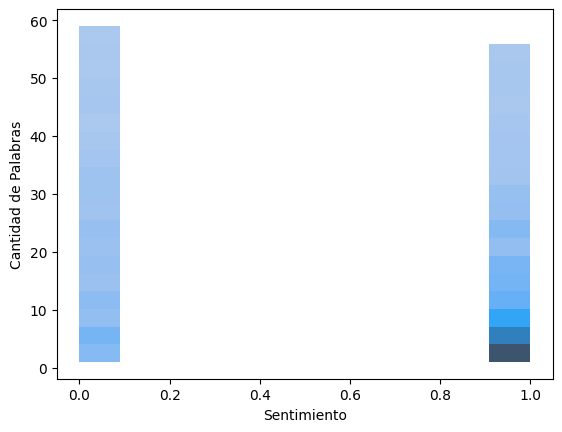

In [73]:
sns.histplot(x = "Sentimiento", y = "Palabras", data = df).set(xlabel='Sentimiento', ylabel='Cantidad de Palabras')

In [ ]:
# Equivalente a:
sns.histplot(x = "x", data = df)

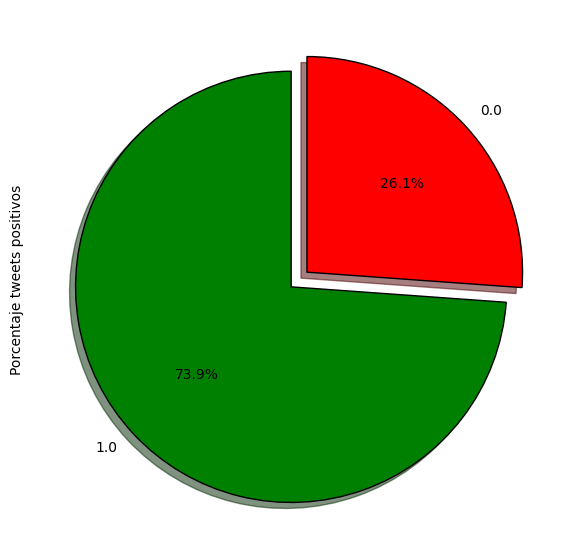

In [84]:
fig = plt.figure(figsize=(7,7))

colors = ('green', 'red', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['Sentimiento'].value_counts()/df.shape[0]

explode=(0.05,0.05)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Porcentaje tweets positivos')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="svg")

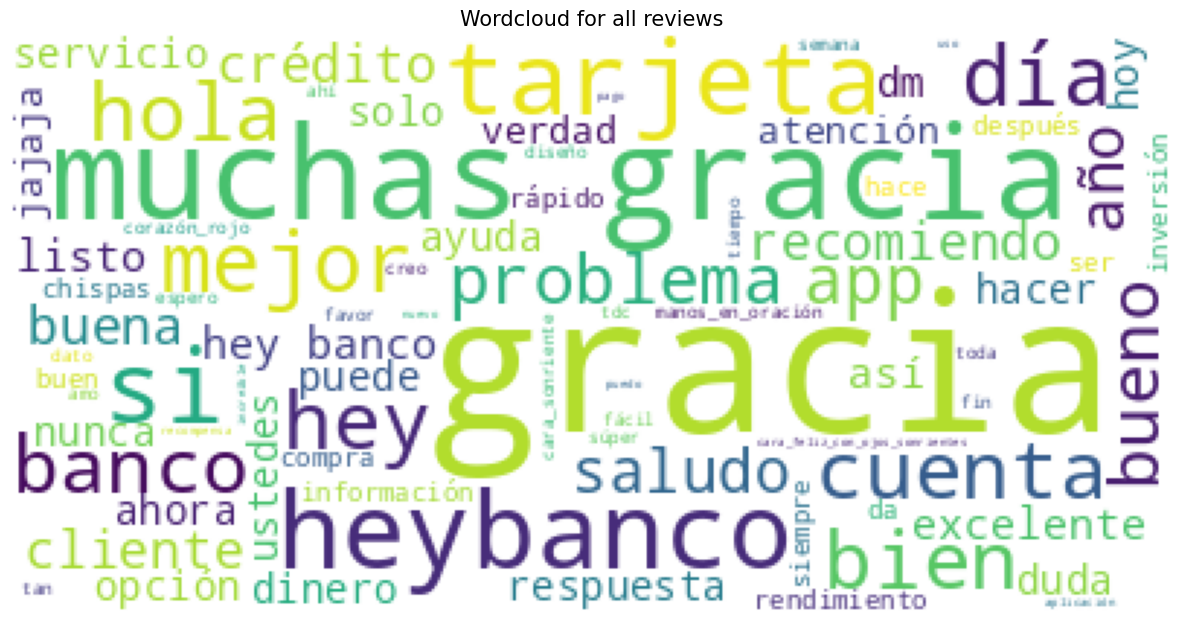

In [85]:
# Combine all reviews
tweets = " ".join([review for review in df['procTweet']])
                    
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=80)

# Generate and plot wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wc.generate(tweets))
plt.title('Wordcloud for all reviews', fontsize=15)
plt.axis('off')
plt.savefig("wordcloudgeneral.svg")
plt.show()

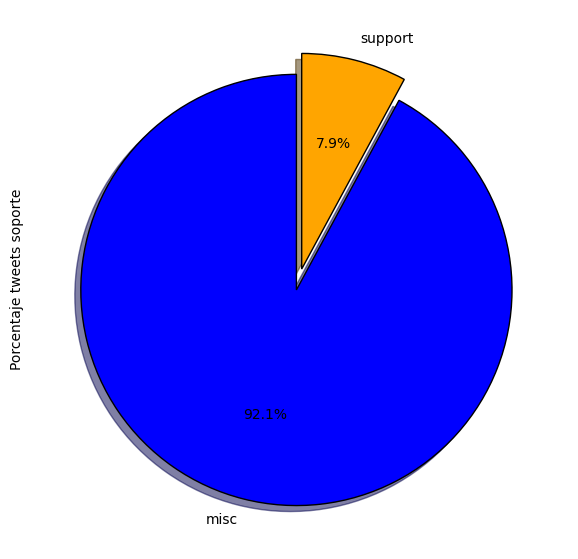

In [88]:
fig = plt.figure(figsize=(7,7))

colors = ('blue', 'orange', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['topic'].value_counts()/df.shape[0]

explode=(0.05,0.05)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Porcentaje tweets soporte')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

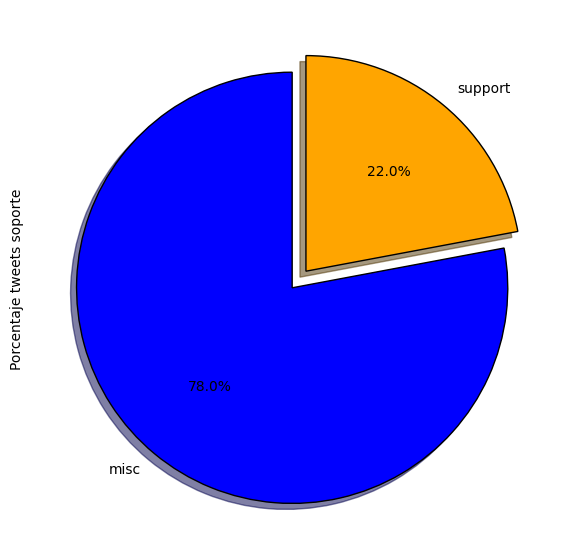

In [92]:
fig = plt.figure(figsize=(7,7))

colors = ('blue', 'orange', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df.loc[df['relevance'] == 1, 'topic'].value_counts()/df.shape[0]

explode=(0.05,0.05)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Porcentaje tweets soporte')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

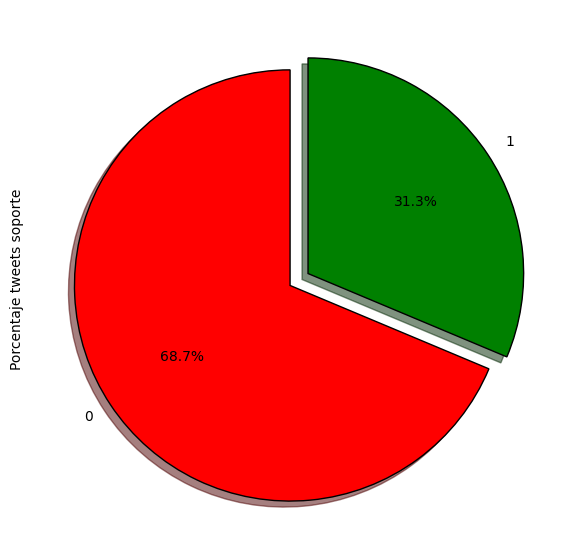

In [91]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['relevance'].value_counts()/df.shape[0]

explode=(0.05,0.05)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Porcentaje tweets soporte')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")